In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

In [2]:
from extract_dataframe import read_json       
from extract_dataframe import TweetDfExtractor    
from clean_tweets_dataframe import Clean_Tweets

In [3]:
_, tweet_list = read_json("data/Economic_Twitter_Data.json")
tweet = TweetDfExtractor(tweet_list)
Data = tweet.get_tweet_df(True)

File Successfully Saved.!!!


In [4]:
cleanTweet = Data[['original_text','polarity']]

In [7]:
def text_category (p):
  if p > 0:
    return 'positive'
  elif p < 0:
    return 'negative'
  else:
    return 'neutral'

In [8]:
score = pd.Series([text_category(row_val) for row_val in cleanTweet['polarity']])

In [9]:
cleanTweet = pd.concat([cleanTweet, score.rename("score")], axis=1)

In [10]:
cleanTweet.head()

,original_text,polarity,score
0,"Annalena Baerbock sagt, es bricht ihr das Her...",0.0,neutral
1,"Merkel schaffte es in 1 Jahr 1 Million ""Flüch...",0.0,neutral
2,"@WRi007 Pharma in Lebensmitteln, Trinkwasser,...",0.0,neutral
3,Die #Deutschen sind ein braves Volk!. Mit #Sp...,0.0,neutral
4,Baerbock verkündet mal so nebenhin in Riga da...,0.0,neutral


C:\Users\Selu\AppData\Local\Temp/ipykernel_11136/921824002.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90)
C:\Users\Selu\AppData\Local\Temp/ipykernel_11136/921824002.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


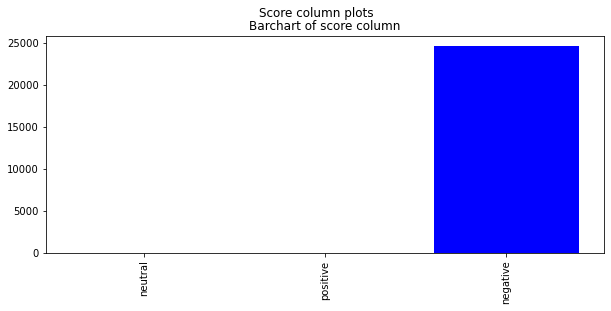

In [11]:
# Visualize The  score  column using piechart and barchart
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['neutral', 'positive', 'negative']
positive = len(cleanTweet[cleanTweet['score'] == "positive"])
negative = len(cleanTweet[cleanTweet['score'] == "negative"])
neutral = len(cleanTweet[cleanTweet['score'] == "neutral"])

# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 1, figsize = (10,4))

# Create a bar plot of score column
ax.bar(x=labels, height=[negative, positive, neutral], color='blue')
ax.set_title('Barchart of score column')
ax.set_xticklabels(labels, rotation=90)

# Add a title to the Figure
fig.suptitle('Score column plots')

# Show the figure
fig.show()

In [12]:
cleanTweet.groupby('score')['original_text'].count()

score
neutral    24625
Name: original_text, dtype: int64

In [13]:
len(cleanTweet['polarity'])

24625

In [14]:
cleanTweet = cleanTweet.drop(cleanTweet[cleanTweet.score == 'neutral'].index)

In [15]:
cleanTweet.head()

,original_text,polarity,score


In [16]:
cleanTweet[1990:2000]

,original_text,polarity,score


In [17]:
cleanTweet.groupby('score')['original_text'].count()

Series([], Name: original_text, dtype: int64)

In [18]:
scoremap = pd.Series([1 if row_val == 'positive' else 0 for row_val in cleanTweet['score']])

C:\Users\Selu\AppData\Local\Temp/ipykernel_11136/3533731819.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  scoremap = pd.Series([1 if row_val == 'positive' else 0 for row_val in cleanTweet['score']])


In [19]:
len(scoremap)

0

In [20]:
cleanTweet['scoremap'] = scoremap

In [21]:
# cleanTweet = pd.concat([cleanTweet, scoremap.rename("scoremap")], axis=1)

In [22]:
cleanTweet[2000:2010]

,original_text,polarity,score,scoremap


In [28]:
tweet_df = pd.read_csv('processed_tweet_data.csv')

In [29]:
cleaner = Clean_Tweets(tweet_df)
tweet_df = cleaner.drop_unwanted_column(tweet_df)
tweet_df = cleaner.drop_duplicate(tweet_df)
tweet_df = cleaner.convert_to_datetime(tweet_df)
tweet_df = cleaner.convert_to_numbers(tweet_df)
clean_tweet_df = cleaner.remove_non_english_tweets(tweet_df)

Automation in Action...!!!


In [30]:
clean_tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          0 non-null      datetime64[ns, UTC]
 1   source              0 non-null      object             
 2   original_text       0 non-null      object             
 3   polarity            0 non-null      float64            
 4   subjectivity        0 non-null      float64            
 5   lang                0 non-null      object             
 6   favorite_count      0 non-null      int64              
 7   retweet_count       0 non-null      int64              
 8   original_author     0 non-null      object             
 9   followers_count     0 non-null      int64              
 10  possibly_sensitive  0 non-null      object             
 11  hashtags            0 non-null      object             
 12  place               0 non-null      object      

In [ ]:
print(X_train.size)
print(X_test.size)
print(y_train.size)
print(y_test.size)

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_vect = CountVectorizer(3,3)
X_train = X_train.replace(np.nan, '', regex=True)
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts = X_train_counts.toarray()

In [ ]:
y_train = y_train.fillna(0)

In [ ]:
# scaling the input
clf = make_pipeline(StandardScaler(),
...                     SGDClassifier(max_iter=9000, tol=1e-2))

In [ ]:
clf.fit(X_train_counts, y_train)

In [ ]:
X_test = X_test.replace(np.nan, '', regex=True)
# use transform not fit_transform
X_test_counts = count_vect.transform(X_test)
X_test_counts = X_test_counts.toarray()
# prediction = clf.prevaluedict(X_test_counts)
prediction = clf.predict(X_test_counts)

In [ ]:
# making prediction
prediction = clf.predict(X_test_counts)

In [ ]:
np.mean(prediction == y_test)